In [1]:
# Instalamos paquetes
!pip install yfinance
!pip install pandas-datareader
!pip install fix-yahoo-finance

  Preparing metadata (setup.py) ... done
  Created wheel for fix-yahoo-finance: filename=fix_yahoo_finance-0.1.37-py3-none-any.whl size=7073 sha256=a0fededd0cb19f78a5ebbad3dddfc1a564b6343faec110c783144674897f6175
  Stored in directory: /root/.cache/pip/wheels/1e/5e/ca/d9dbe97f5c895289286a5f99311e9e9633c9898f35d42802ca
Successfully built fix-yahoo-finance


**UTILIDAD DE LOS PAQUETES**


1.   *pandas:* Se utiliza en Python para importar la biblioteca pandas con un alias. La biblioteca pandas es una biblioteca muy popular para el análisis y manipulación de datos en Python, y se utiliza ampliamente en ciencia de datos y análisis de datos.
2.   *import numpy as np:* Se utiliza en Python para importar la biblioteca NumPy con un alias. NumPy es una biblioteca fundamental en Python que proporciona soporte para trabajar con matrices y arreglos multidimensionales, junto con una amplia variedad de funciones y operaciones matemáticas y numéricas. La razón principal para importar NumPy con el alias np es simplificar el acceso a sus funciones y métodos, ya que np es un nombre corto y comúnmente utilizado en la comunidad de Python.
3. *Matplotlib:* Es una biblioteca muy popular para la creación de gráficos y visualizaciones en Python
4. *import statsmodels.graphics.tsaplots as sgt*: Se utiliza en Python para importar un módulo específico de la biblioteca statsmodels llamado graphics.tsaplots con un alias sgt. Este módulo se utiliza para crear y visualizar gráficos y tramas relacionados con el análisis de series temporales.
5. *from statsmodels.tsa.arima_model import ARMA*: Se utiliza en Python para importar la clase ARMA del módulo arima_model dentro de la biblioteca statsmodels. ARMA es un acrónimo de "Media móvil autorregresiva", y se refiere a un tipo de modelo utilizado en el análisis de series temporales para modelar y predecir datos secuenciales.
6. *from scipy.stats.distributions import chi2*: Se utiliza en Python para importar la distribución chi-cuadrado (chi-square) de la biblioteca SciPy.
7. *import statsmodels.tsa.stattools as sts*: Se utiliza en Python para importar el módulo stattools dentro de la biblioteca statsmodels con el alias sts. Este módulo proporciona una variedad de herramientas y funciones relacionadas con el análisis de series temporales en estadísticas.
8. *import seaborn as sns*: Se utiliza en Python para importar la biblioteca Seaborn con el alias sns. Seaborn es una biblioteca de visualización de datos basada en Matplotlib que simplifica y mejora la creación de gráficos estadísticos y visuales en Python.
9. *sns.set()*: Es una función de la biblioteca Seaborn en Python que se utiliza para configurar y personalizar la apariencia de los gráficos generados por Seaborn. Seaborn proporciona una variedad de paletas de colores, estilos y ajustes por defecto que se pueden personalizar según tus preferencias.

#**IMPORTANDO PAQUETES**


In [16]:
#Importando los paquetes relevantes
import pandas as pd
import numpy as np
import yfinance
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts
import seaborn as sns
sns.set()

#**Importación de datos y preprocesamiento**

In [3]:
raw_csv_data = pd.read_csv('/content/drive/MyDrive/SegundaTarea_VolatilidadenPython/df_comp.csv')
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [4]:
df_comp['market_value']=df_comp.ftse

In [5]:
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

**LLR Test**

"Likelihood Ratio Test" o "Prueba de Razón de Verosimilitud" es una técnica estadística utilizada en el contexto de modelos de regresión y análisis de varianza. Esta prueba se utiliza para comparar dos modelos estadísticos, uno de los cuales es un subconjunto del otro, y determinar si el modelo más complejo (con más parámetros) es estadísticamente significativamente mejor que el modelo más simple (con menos parámetros).

In [6]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

**El DF-Test**

Dickey-Fuller Test, es una prueba estadística que se utiliza en el contexto de análisis de series temporales para verificar si una serie temporal es estacionaria o no estacionaria. La estacionariedad es una propiedad importante en el análisis de series temporales, ya que muchas técnicas y modelos requieren que los datos sean estacionarios para funcionar correctamente.

**Datos extras**

El código *sts.adfuller(df.market_value)* es una llamada a la función adfuller de alguna biblioteca o paquete de Python, como Statsmodels. Esta función se utiliza para realizar el Test de Dickey-Fuller Aumentado (Augmented Dickey-Fuller Test o ADF Test, en inglés), que es una prueba estadística utilizada para evaluar la estacionariedad de una serie temporal, especialmente en el contexto de análisis de series financieras.

In [7]:
sts.adfuller(df.market_value)

(-2.1953112298839157,
 0.20795160917921918,
 7,
 988,
 {'1%': -3.4369860032923145,
  '5%': -2.8644697838498376,
  '10%': -2.5683299626694422},
 11213.149733515938)

#**Usando devoluciones**



1.  *df['returns'] = df.market_value.pct_change(1).mul(100)*: Esta línea crea una nueva columna llamada "returns" en el DataFrame df. La columna "returns" contendrá los rendimientos diarios de la serie de datos "market_value". Para calcular los rendimientos diarios, se utilizan los siguientes pasos:


*   df.market_value: Se accede a la columna "market_value" en el DataFrame df, que se supone contiene los valores diarios de algún instrumento financiero, como una acción o un índice.
*   .pct_change(1): Esta función calcula el cambio porcentual entre un día y el día siguiente para cada valor en la columna "market_value". El argumento "1" indica que se está calculando el cambio en un período de un día.
*   .mul(100): Multiplica el resultado por 100 para expresar los rendimientos en términos porcentuales. Esto convierte los cambios relativos en porcentajes.


2.  *df = df.iloc[1:]*: Después de calcular los rendimientos diarios y almacenarlos en la columna "returns", esta línea elimina la primera fila de datos en el DataFrame df. Esto se hace utilizando df.iloc[1:], que selecciona todas las filas a partir de la segunda fila en adelante, descartando la primera fila. Esto es común en el análisis de series temporales financieras, ya que la primera fila generalmente contiene valores nulos o no se pueden calcular rendimientos debido a la falta de datos previos.

In [8]:
df['returns'] = df.market_value.pct_change(1).mul(100)
df = df.iloc[1:]

<ipython-input-8-fca9bc180084>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['returns'] = df.market_value.pct_change(1).mul(100)


In [9]:
sts.adfuller(df.returns)

(-11.301555663436806,
 1.3036968744849428e-20,
 7,
 987,
 {'1%': -3.4369927443074353,
  '5%': -2.864472756705845,
  '10%': -2.568331546097238},
 3086.055887783363)

#**ACF and PACF for Returns**


1.  *sgt.plot_acf(df.returns, lags=40, zero=False)*: Este código utiliza una función o método llamado sgt.plot_acf para trazar la función de autocorrelación (ACF) de los rendimientos diarios. La ACF muestra cómo están correlacionados los valores en la serie consigo mismos a medida que se desplazan en el tiempo (lags). En este caso, se trazarán los valores de ACF para un máximo de 40 lags. El argumento zero=False significa que no se mostrará la autocorrelación en el lag 0, que generalmente es igual a 1.

2. *plt.title("ACF FTSE Returns", size=24)*: Esta línea establece el título del gráfico. El título es "ACF FTSE Returns", lo que indica que el gráfico representa la función de autocorrelación de los rendimientos del índice FTSE.

3. *plt.show()*: Esta línea muestra el gráfico en la pantalla.




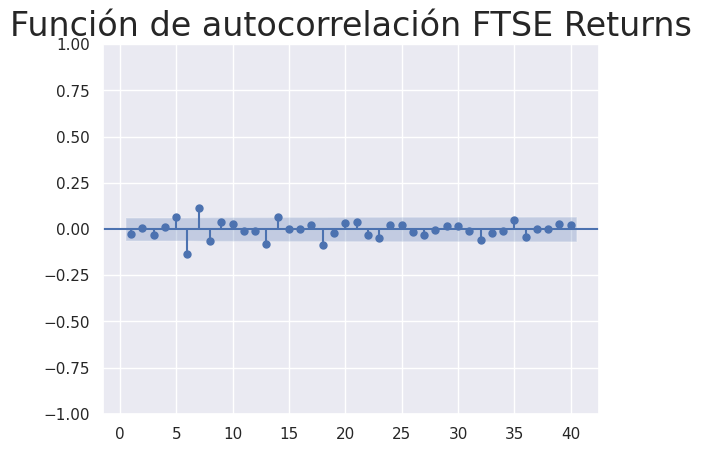

In [11]:
sgt.plot_acf(df.returns, lags=40, zero = False)
plt.title("Función de autocorrelación FTSE Returns", size=24)
plt.show()



1.  *sgt.plot_pacf(df.returns, lags=40, zero=False, method='ols')*: Esta línea utiliza una función o método llamado sgt.plot_pacf para trazar la función de autocorrelación parcial (PACF) de los rendimientos diarios. La PACF muestra la correlación entre un valor en un lag específico y los valores en lags anteriores, teniendo en cuenta los efectos de los lags intermedios. En este caso, se trazarán los valores de PACF para un máximo de 40 lags. El argumento zero=False significa que no se mostrará la autocorrelación parcial en el lag 0, que generalmente es igual a 1. El argumento method='ols' indica que se está utilizando el método de Mínimos Cuadrados Ordinarios (OLS) para estimar los coeficientes de la PACF.

2. *plt.title("PACF FTSE Returns", size=24)*: Esta línea establece el título del gráfico. El título es "PACF FTSE Returns", lo que indica que el gráfico representa la función de autocorrelación parcial de los rendimientos del índice FTSE.

3. *plt.show()*: Esta línea muestra el gráfico en la pantalla.



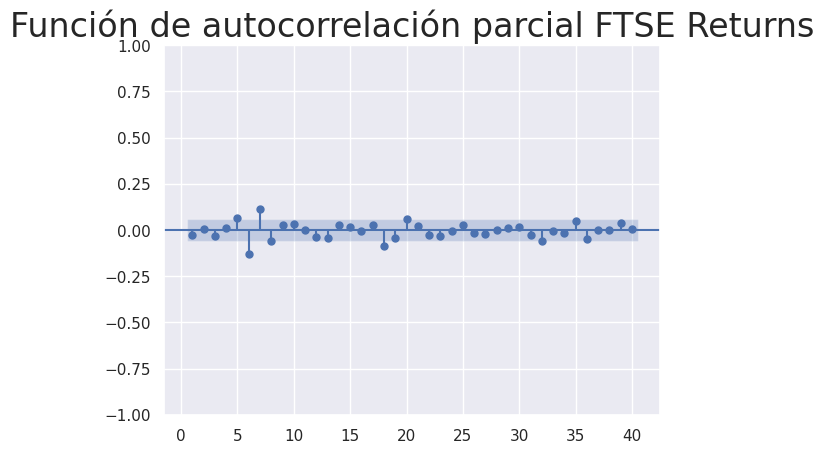

In [12]:
sgt.plot_pacf(df.returns, lags = 40, zero = False, method = ('ols'))
plt.title("Función de autocorrelación parcial FTSE Returns", size=24)
plt.show()

#**AR(1) for Returns**


1.   *import statsmodels.api as sm*: Esta línea importa la biblioteca statsmodels bajo el alias sm. Esta biblioteca proporciona herramientas para realizar análisis de series temporales, incluyendo la construcción de modelos ARIMA.
2.   *order = (1, 0, 0)*: Aquí se especifica el orden del modelo ARIMA que se va a ajustar. El orden (1, 0, 0) indica que se trata de un modelo ARIMA(p, d, q) donde:


*   p: Es el orden del componente autorregresivo (AR) y se establece en 1.
*   d: Es el orden de diferenciación (I) y se establece en 0, lo que significa que los datos de entrada ya son estacionarios.
*   q: Es el orden del componente de media móvil (MA) y se establece en 0.

3. *model_ret_ar_1 = sm.tsa.ARIMA(df.returns, order=order)*: Aquí se crea un objeto ARIMA utilizando el orden especificado. df.returns se utiliza como la serie temporal de entrada que se va a modelar.

4. *results_ret_ar_1 = model_ret_ar_1.fit()*: Esta línea ajusta el modelo ARIMA a los datos de la serie temporal df.returns utilizando el orden especificado. El resultado del ajuste se almacena en la variable results_ret_ar_1.

5. *results_ret_ar_1.summary()*: Finalmente, esta línea muestra un resumen estadístico del modelo ARIMA ajustado. El resumen incluye información importante sobre los parámetros del modelo, la calidad del ajuste y las estadísticas de diagnóstico.





In [18]:
import statsmodels.api as sm
# Especifica el orden del modelo ARMA (1, 0)
order = (1, 0, 0)
# Crea el modelo ARIMA
model_ret_ar_1 = sm.tsa.ARIMA(df.returns, order=order)
# Ajusta el modelo a tus datos
results_ret_ar_1 = model_ret_ar_1.fit()
# Para ver el resumen estadístico
results_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                  995
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1588.975
Date:                Wed, 11 Oct 2023   AIC                           3183.951
Time:                        02:55:12   BIC                           3198.659
Sample:                    12-04-2018   HQIC                          3189.542
                         - 09-26-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0066      0.038      0.172      0.863      -0.069       0.082
ar.L1         -0.0282      0.017     -1.623      0.105      -0.062       0.006
sigma2         1.4276      0.024     59.371      0.000       1.381       1.475
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              7156.74
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                            -0.90
Prob(H) (two-sided):                  0.97   Kurtosis:                        16.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#**Modelos AR de mayor retraso para devoluciones**

**AR(2)**

In [14]:
#AR(2)
# Especifica el orden del modelo ARMA (2, 0)
order = (2, 0, 0)
# Crea el modelo ARIMA
model_ret_ar_2 = sm.tsa.ARIMA(df.returns, order=order)
# Ajusta el modelo a tus datos
results_ret_ar_2 = model_ret_ar_2.fit()
# Para ver el resumen estadístico
results_ret_ar_2.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                  995
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1588.968
Date:                Wed, 11 Oct 2023   AIC                           3185.935
Time:                        02:46:36   BIC                           3205.546
Sample:                    12-04-2018   HQIC                          3193.390
                         - 09-26-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0066      0.039      0.171      0.864      -0.069       0.082
ar.L1         -0.0280      0.018     -1.595      0.111      -0.062       0.006
ar.L2          0.0040      0.020      0.203      0.839      -0.034       0.042
sigma2         1.4276      0.024     59.180      0.000       1.380       1.475
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              7146.91
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                            -0.90
Prob(H) (two-sided):                  0.96   Kurtosis:                        16.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**LLR-Test entre el model_ret_ar_1 y el model_ret_ar_2**

Es una prueba estadística utilizada en el contexto de modelos econométricos y estadísticos para comparar la bondad de ajuste de dos modelos diferentes, generalmente un modelo más simple con uno más complejo. La prueba compara si el modelo más complejo mejora significativamente la calidad del ajuste en comparación con el modelo más simple.

Si el valor p es menor que un nivel de significancia dado (generalmente 0.05), se podría concluir que el modelo model_ret_ar_2 es estadísticamente mejor que el modelo model_ret_ar_1 en términos de ajuste.

In [19]:
#LLR-Test
LLR_test(model_ret_ar_1, model_ret_ar_2)

0.9

**AR(3)**


In [20]:
#AR(3)
# Especifica el orden del modelo ARMA (3, 0)
order = (3, 0, 0)
# Crea el modelo ARIMA
model_ret_ar_3 = sm.tsa.ARIMA(df.returns, order=order)
# Ajusta el modelo a tus datos
results_ret_ar_3 = model_ret_ar_3.fit()
# Para ver el resumen estadístico
results_ret_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                  995
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -1588.437
Date:                Wed, 11 Oct 2023   AIC                           3186.875
Time:                        03:04:10   BIC                           3211.389
Sample:                    12-04-2018   HQIC                          3196.194
                         - 09-26-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0069      0.038      0.182      0.855      -0.067       0.081
ar.L1         -0.0280      0.018     -1.580      0.114      -0.063       0.007
ar.L2          0.0029      0.020      0.146      0.884      -0.036       0.042
ar.L3         -0.0328      0.015     -2.230      0.026      -0.062      -0.004
sigma2         1.4261      0.027     52.790      0.000       1.373       1.479
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              7907.39
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                            -0.95
Prob(H) (two-sided):                  0.93   Kurtosis:                        16.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**LLR-Test entre el model_ret_ar_2 y el model_ret_ar_3**


In [21]:
#LLR-Test
LLR_test(model_ret_ar_2, model_ret_ar_3)

0.303

**AR(4)**


In [24]:
#AR(4)
# Especifica el orden del modelo ARMA (4, 0)
order = (4, 0, 0)
# Crea el modelo ARIMA
model_ret_ar_4= sm.tsa.ARIMA(df.returns, order=order)
# Ajusta el modelo a tus datos
results_ret_ar_4 = model_ret_ar_4.fit()
print(results_ret_ar_4.summary())
print ("LLR test: " + str(LLR_test(model_ret_ar_3, model_ret_ar_4)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                  995
Model:                 ARIMA(4, 0, 0)   Log Likelihood               -1588.387
Date:                Wed, 11 Oct 2023   AIC                           3188.773
Time:                        03:08:45   BIC                           3218.190
Sample:                    12-04-2018   HQIC                          3199.956
                         - 09-26-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0068      0.039      0.175      0.861      -0.069       0.083
ar.L1         -0.0276      0.018     -1.536      0.124      -0.063       0.008
ar.L2          0.0028      0.020      0.143      0.8

**AR(5)**

In [25]:
#AR(5)
# Especifica el orden del modelo ARMA (5, 0)
order = (5, 0, 0)
# Crea el modelo ARIMA
model_ret_ar_5= sm.tsa.ARIMA(df.returns, order=order)
# Ajusta el modelo a tus datos
results_ret_ar_5 = model_ret_ar_5.fit()
print(results_ret_ar_5.summary())
print ("LLR test: " + str(LLR_test(model_ret_ar_4, model_ret_ar_5)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                  995
Model:                 ARIMA(5, 0, 0)   Log Likelihood               -1586.154
Date:                Wed, 11 Oct 2023   AIC                           3186.308
Time:                        03:10:48   BIC                           3220.627
Sample:                    12-04-2018   HQIC                          3199.355
                         - 09-26-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0063      0.041      0.151      0.880      -0.075       0.088
ar.L1         -0.0283      0.018     -1.574      0.115      -0.064       0.007
ar.L2          0.0051      0.021      0.238      0.8

**AR(6)**

In [26]:
#AR(6)
# Especifica el orden del modelo ARMA (6, 0)
order = (6, 0, 0)
# Crea el modelo ARIMA
model_ret_ar_6= sm.tsa.ARIMA(df.returns, order=order)
# Ajusta el modelo a tus datos
results_ret_ar_6 = model_ret_ar_6.fit()
print(results_ret_ar_6.summary())
print ("LLR test: " + str(LLR_test(model_ret_ar_5, model_ret_ar_6)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                  995
Model:                 ARIMA(6, 0, 0)   Log Likelihood               -1577.426
Date:                Wed, 11 Oct 2023   AIC                           3170.852
Time:                        03:12:17   BIC                           3210.074
Sample:                    12-04-2018   HQIC                          3185.763
                         - 09-26-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0071      0.036      0.196      0.845      -0.064       0.079
ar.L1         -0.0193      0.021     -0.913      0.361      -0.061       0.022
ar.L2          0.0068      0.022      0.310      0.7

**AR(7)**

In [28]:
#AR(7)
# Especifica el orden del modelo ARMA (7, 0)
order = (7, 0, 0)
# Crea el modelo ARIMA
model_ret_ar_7= sm.tsa.ARIMA(df.returns, order=order)
# Ajusta el modelo a tus datos
results_ret_ar_7 = model_ret_ar_7.fit()
results_ret_ar_7.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                  995
Model:                 ARIMA(7, 0, 0)   Log Likelihood               -1571.137
Date:                Wed, 11 Oct 2023   AIC                           3160.274
Time:                        03:13:57   BIC                           3204.398
Sample:                    12-04-2018   HQIC                          3177.048
                         - 09-26-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0065      0.041      0.158      0.875      -0.074       0.087
ar.L1         -0.0045      0.022     -0.206      0.837      -0.048       0.039
ar.L2         -0.0004      0.023     -0.019      0.985      -0.045       0.044
ar.L3         -0.0385      0.018     -2.180      0.029      -0.073      -0.004
ar.L4          0.0166      0.019      0.877      0.381      -0.020       0.054
ar.L5          0.0628      0.024      2.660      0.008       0.017       0.109
ar.L6         -0.1300      0.024     -5.501      0.000      -0.176      -0.084
ar.L7          0.1126      0.024      4.761      0.000       0.066       0.159
sigma2         1.3771      0.030     45.524      0.000       1.318       1.436
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              7035.94
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.93
Prob(H) (two-sided):                  0.58   Kurtosis:                        15.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**LLR-Test entre el model_ret_ar_6 y el model_ret_ar_7**

In [29]:
#LLR-Test
print (LLR_test(model_ret_ar_6, model_ret_ar_7))

0.0


#**Normalizar valores**


1.   *benchmark = df.market_value.iloc[0]*: Se utiliza para asignar el valor del primer elemento de la columna "market_value" en el DataFrame df a la variable benchmark. En otras palabras, está extrayendo el valor del primer día o período de la serie de datos contenida en la columna "market_value" y almacenándolo en la variable benchmark.
2.  *df['norm'] = df.market_value.div(benchmark).mul(100)*: Se utiliza para crear una nueva columna llamada "norm" en el DataFrame df. El propósito de esta línea de código es normalizar los valores en la columna "market_value" dividiéndolos por el valor almacenado en la variable benchmark y luego multiplicando el resultado por 100.
3. *sts.adfuller(df.norm)*: Se utiliza para aplicar el Test de Dickey-Fuller Aumentado (Augmented Dickey-Fuller Test o ADF Test) a la serie de datos contenida en la columna "norm" del DataFrame df


In [30]:
benchmark = df.market_value.iloc[0]

In [31]:
df['norm'] = df.market_value.div(benchmark).mul(100)

In [32]:
sts.adfuller(df.norm)

(-2.1941964231600024,
 0.20835855953055665,
 7,
 987,
 {'1%': -3.4369927443074353,
  '5%': -2.864472756705845,
  '10%': -2.568331546097238},
 2936.9506057692042)



1.   *bench_ret = df.returns.iloc[0]*: En esta línea, se asigna el valor del primer rendimiento diario de la columna "returns" del DataFrame df a la variable bench_ret. Este valor se utilizará como punto de referencia para normalizar los rendimientos diarios posteriores.
2.   *df['norm_ret'] = df.returns.div(bench_ret).mul(100)*: En esta línea, se crea una nueva columna llamada "norm_ret" en el DataFrame df. Los rendimientos diarios se normalizan dividiéndolos por el valor almacenado en bench_ret (el primer rendimiento diario) y luego se multiplican por 100 para expresar los rendimientos normalizados en términos porcentuales. Esto normaliza los rendimientos en relación con el rendimiento del primer día.
3. *sts.adfuller(df.norm_ret)*: Finalmente, se aplica el Test de Dickey-Fuller Aumentado (ADF Test) a la serie normalizada de rendimientos diarios contenida en la columna "norm_ret" del DataFrame df. El resultado de esta prueba proporcionará información sobre si la serie de rendimientos normalizados es estacionaria o no estacionaria.


In [33]:
bench_ret = df.returns.iloc[0]
df['norm_ret'] = df.returns.div(bench_ret).mul(100)
sts.adfuller(df.norm_ret)

(-11.301555663436789,
 1.3036968744850832e-20,
 7,
 987,
 {'1%': -3.4369927443074353,
  '5%': -2.864472756705845,
  '10%': -2.568331546097238},
 13163.185441001326)

#**Devoluciones normalizadas**

In [36]:
# Especifica el orden del modelo ARMA (1, 0)
order = (1, 0, 0)
# Crea el modelo ARIMA
model_norm_ret_ar_1= sm.tsa.ARIMA(df.norm_ret, order=order)
# Ajusta el modelo a tus datos
results_norm_ret_ar_1 = model_norm_ret_ar_1.fit()
results_norm_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                  995
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -6746.766
Date:                Wed, 11 Oct 2023   AIC                          13499.531
Time:                        03:30:54   BIC                          13514.239
Sample:                    12-04-2018   HQIC                         13505.123
                         - 09-26-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1790      6.855     -0.172      0.863     -14.614      12.256
ar.L1         -0.0282      0.017     -1.621      0.105      -0.062       0.006
sigma2      4.544e+04    766.030     59.324      0.000    4.39e+04    4.69e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              7156.72
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                             0.90
Prob(H) (two-sided):                  0.97   Kurtosis:                        16.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
# Especifica el orden del modelo ARMA (2, 0)
order = (2, 0, 0)
# Crea el modelo ARIMA
model_norm_ret_ar_2= sm.tsa.ARIMA(df.norm_ret, order=order)
# Ajusta el modelo a tus datos
results_norm_ret_ar_2 = model_norm_ret_ar_2.fit()
results_norm_ret_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                  995
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -6746.758
Date:                Wed, 11 Oct 2023   AIC                          13501.515
Time:                        03:32:11   BIC                          13521.126
Sample:                    12-04-2018   HQIC                         13508.971
                         - 09-26-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1790      6.901     -0.171      0.864     -14.705      12.347
ar.L1         -0.0280      0.018     -1.595      0.111      -0.063       0.006
ar.L2          0.0040      0.020      0.203      0.839      -0.034       0.042
sigma2      4.542e+04    767.724     59.163      0.000    4.39e+04    4.69e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              7146.91
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                             0.90
Prob(H) (two-sided):                  0.96   Kurtosis:                        16.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
# Especifica el orden del modelo ARMA (7, 0)
order = (7, 0, 0)
# Crea el modelo ARIMA
model_norm_ret_ar_7= sm.tsa.ARIMA(df.norm_ret, order=order)
# Ajusta el modelo a tus datos
results_norm_ret_ar_7 = model_norm_ret_ar_7.fit()
results_norm_ret_ar_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                  995
Model:                 ARIMA(7, 0, 0)   Log Likelihood               -6728.934
Date:                Wed, 11 Oct 2023   AIC                          13475.867
Time:                        03:33:04   BIC                          13519.992
Sample:                    12-04-2018   HQIC                         13492.642
                         - 09-26-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1790      7.298     -0.162      0.872     -15.483      13.125
ar.L1         -0.0045      0.022     -0.206      0.837      -0.048       0.038
ar.L2         -0.0005      0.023     -0.020      0.984      -0.045       0.044
ar.L3         -0.0385      0.018     -2.191      0.028      -0.073      -0.004
ar.L4          0.0166      0.019      0.883      0.377      -0.020       0.053
ar.L5          0.0628      0.023      2.673      0.008       0.017       0.109
ar.L6         -0.1300      0.024     -5.529      0.000      -0.176      -0.084
ar.L7          0.1126      0.024      4.786      0.000       0.067       0.159
sigma2      4.357e+04    952.255     45.759      0.000    4.17e+04    4.54e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              7035.89
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                             0.93
Prob(H) (two-sided):                  0.58   Kurtosis:                        15.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#**Analizando los residuos**


1.   *df['res_ret'] = results_ret_ar_6.resid*: Se utiliza para crear una nueva columna llamada "res_ret" en el DataFrame df. En esta columna, se almacenan los residuos del modelo ARIMA results_ret_ar_6, que parece ser un modelo de series temporales ajustado a los datos de rendimientos diarios.
2.  *df.res_ret.mean()*: Calcula la media de los residuos almacenados en la columna "res_ret" del DataFrame df. Los residuos son las diferencias entre los valores observados y los valores predichos por un modelo, en este caso, un modelo ARIMA ajustado a la serie de rendimientos diarios.

3. *df.res_ret.var()*:Calcula la varianza de los residuos almacenados en la columna "res_ret" del DataFrame df. La varianza es una medida de la dispersión o la variabilidad de los datos, en este caso, los residuos del modelo ARIMA.
4.  *sts.adfuller(df.res_ret)*: Se utiliza el Test de Dickey-Fuller Aumentado (ADF Test) para evaluar la estacionariedad de la serie de residuos almacenada en la columna "res_ret" del DataFrame df. Este test es comúnmente utilizado para verificar si una serie temporal es estacionaria o no estacionaria.

In [39]:
df['res_ret'] = results_ret_ar_6.resid

In [40]:
df.res_ret.mean()

-0.0003450325270662195

In [41]:
df.res_ret.var()

1.3964807272137931

In [42]:
sts.adfuller(df.res_ret)

(-31.039090106428027,
 0.0,
 0,
 994,
 {'1%': -3.43694584277544,
  '5%': -2.8644520725172873,
  '10%': -2.5683205291305176},
 3088.054241896413)



1.   *sgt.plot_acf(df.res_ret, zero=False, lags=40)*: Esta línea utiliza la función plot_acf de la biblioteca statsmodels.graphics.tsaplots (generalmente abreviada como sgt) para trazar la ACF de los residuos. Los argumentos df.res_ret especifican la serie de residuos que se va a analizar. zero=False indica que no se mostrará la autocorrelación en el lag 0, y lags=40 establece el número de lags que se mostrarán en el gráfico, en este caso, un máximo de 40 lags.
2.   *plt.title("ACF Of Residuals for Returns", size=24)*: Esta línea establece un título para el gráfico. El título es "ACF Of Residuals for Returns", lo que indica que el gráfico representa la función de autocorrelación de los residuos en relación con los rendimientos diarios.
3. *plt.show()*: Finalmente, esta línea muestra el gráfico en la pantalla utilizando la biblioteca matplotlib.



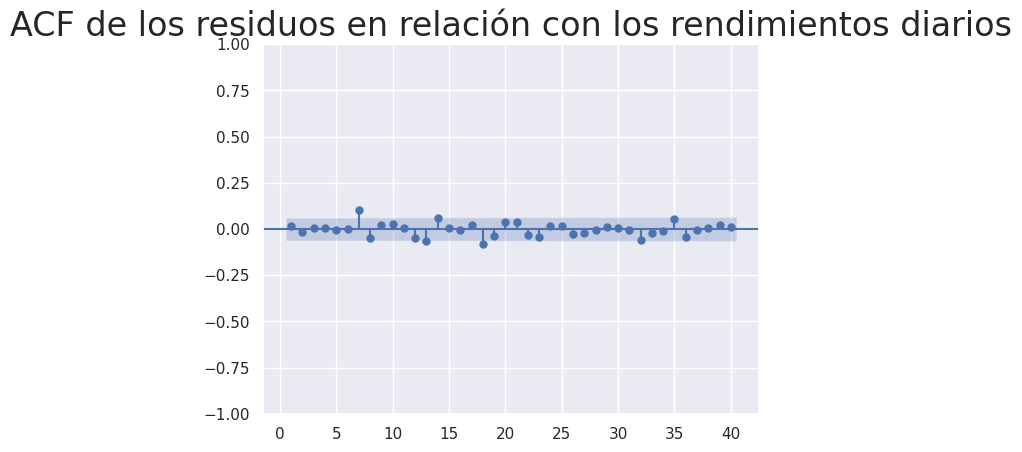

In [45]:
sgt.plot_acf(df.res_ret, zero = False, lags = 40)
plt.title("ACF de los residuos en relación con los rendimientos diarios",size=24)
plt.show()



1.   *df.res_ret.plot(figsize=(20, 5))*: Esta línea utiliza la función plot en la columna "res_ret" del DataFrame df para trazar la serie temporal de los residuos. El argumento figsize establece el tamaño de la figura del gráfico en 20 pulgadas de ancho y 5 pulgadas de alto. Esto controla las dimensiones del gráfico en la visualización.
2.   *plt.title("Residuals of Returns", size=24)*: Esta línea establece un título para el gráfico. El título es "Residuals of Returns," lo que indica que el gráfico representa la serie de residuos relacionados con los rendimientos diarios.
3. *plt.show()*: Finalmente, esta línea muestra el gráfico en la pantalla utilizando la biblioteca matplotlib.



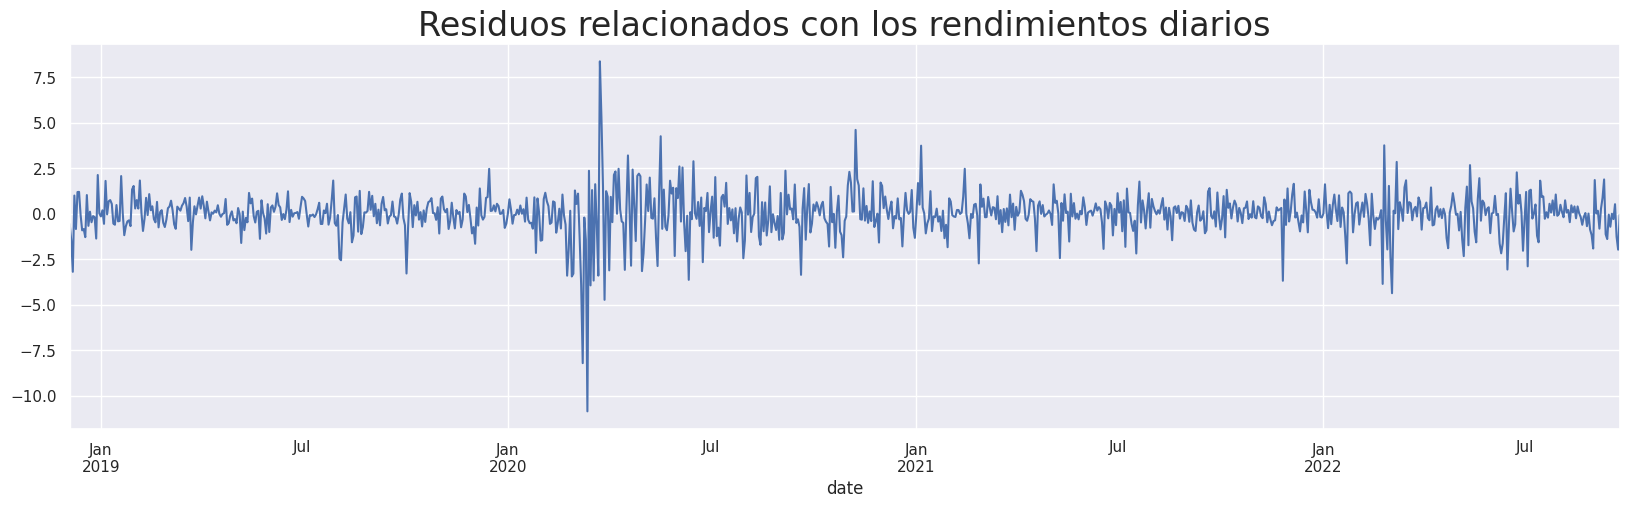

In [46]:
df.res_ret.plot(figsize=(20,5))
plt.title("Residuos relacionados con los rendimientos diarios", size=24)
plt.show()